In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'c:\\Users\\User\\Desktop\\Work\\Year4_1\\Image_Processing\\Project'

In [3]:
%%capture
#@title
import os
import wget
import sys
import tensorflow.compat.v1 as tf

# Download source code.
if "efficientdet" not in os.getcwd():
  !git clone --depth 1 https://github.com/google/automl
  os.chdir('automl/efficientdet')
  sys.path.append('.')
  !pip3 install -r requirements.txt
  !pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
else:
  !git pull

In [4]:
# os.chdir('automl/efficientdet')
!pip3 install pycocotools
!pip3 install -r requirements.txt
!pip3 install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Cloning https://github.com/cocodataset/cocoapi.git to c:\users\user\appdata\local\temp\pip-req-build-9cauw7l2
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pycocotools
Failed to build pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.6
    Uninstalling pycocotools-2.0.6:
      Successfully uninstalled pycocotools-2.0.6
  Running setup.py install for pycocotools: started
  Running setup.py install for pycocotools: finished with status 'error'
  Rolling back uninstall of pycocotools
  Moving to d:\wpsystem\s-1-5-21-1340534889-2409676733-3306861518-1001\appdata\local\packages\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\localcache\local-packages\python39\site-packages\pycocotools-2.0.6.dist-info\
   from D:\WpSystem\S-1-5-21-1340534889-2409676733-33

  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git 'C:\Users\User\AppData\Local\Temp\pip-req-build-9cauw7l2'
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [22 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-39
      creating build\lib.win-amd64-cpython-39\pycocotools
      copying pycocotools\coco.py -> build\lib.win-amd64-cpython-39\pycocotools
      copying pycocotools\cocoeval.py -> build\lib.win-amd64-cpython-39\pycocotools
      copying pycocotools\mask.py -> build\lib.win-amd64-cpython-39\pycocotools
      copying pycocotools\__init__.py -> build\lib.win-amd64-cpython-39\pycocotools
      running build_ext
      cythoning pycocotools/_mask.pyx to pycocotools\_mask.c
      C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\L


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


ERROR: Invalid requirement: "'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'"
Hint: = is not a valid operator. Did you mean == ?


In [5]:
MODEL = 'efficientdet-d6'  #@param
# MODEL = 'efficientdet-d0'  #@param
import wget
import tarfile
def download(m):
  if m not in os.listdir():
    # !wget https://storage.googleapis.com/cloud-tpu-checkpoints/efficientdet/coco/{m}.tar.gz\
    # !tar zxf {m}.tar.gz
    wget.download(f"https://storage.googleapis.com/cloud-tpu-checkpoints/efficientdet/coco/{m}.tar.gz")
    file = tarfile.open(f'{m}.tar.gz')
    file.extractall(f"./{m}")
  ckpt_path = os.path.join(os.getcwd(), m)
  return ckpt_path

# Download checkpoint.
ckpt_path = download(MODEL)
print('Use model in {}'.format(ckpt_path))

# Prepare image and visualization settings.
# image_url =  'https://user-images.githubusercontent.com/11736571/77320690-099af300-6d37-11ea-9d86-24f14dc2d540.png'#@param
# image_name = 'img.png' #@param
# !wget {image_url} -O img.png
# wget.download(f'{image_url}','img.png')
import os
# img_path = os.path.join(os.getcwd(), 'img.png')

min_score_thresh = 0.3  #@param
max_boxes_to_draw = 500 #@param
line_thickness =   2#@param

import PIL
# Get the largest of height/width and round to 128.
# image_size = max(PIL.Image.open(img_path).size)
ckpt_path = os.path.join(ckpt_path, f'{MODEL}')

Use model in c:\Users\User\Desktop\Work\Year4_1\Image_Processing\Project\automl\efficientdet\efficientdet-d6


In [6]:
ckpt_path

'c:\\Users\\User\\Desktop\\Work\\Year4_1\\Image_Processing\\Project\\automl\\efficientdet\\efficientdet-d6\\efficientdet-d6'

# Inference

In [7]:
saved_model_dir = 'savedmodel'
!rm -rf {saved_model_dir}
# !python model_inspect.py --runmode=saved_model --model_name={MODEL} \
#   --ckpt_path={ckpt_path} --saved_model_dir={saved_model_dir} --hparams="image_size=640x480"
!python model_inspect.py --runmode=saved_model --model_name={MODEL} \
  --ckpt_path={ckpt_path} --saved_model_dir={saved_model_dir} --hparams="image_size=640x360"
# !python model_inspect.py --runmode=saved_model --model_name={MODEL} \
#   --ckpt_path={ckpt_path} --saved_model_dir={saved_model_dir} --hparams="image_size=1920x1080"

2022-12-05 20:30:50.140214: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.

W1205 20:30:52.908403 27520 module_wrapper.py:149] From c:\Users\User\Desktop\Work\Year4_1\Image_Processing\Project\automl\efficientdet\utils.py:601: The name tf.keras.layers.enable_v2_dtype_behavior is deprecated. Please use tf.compat.v1.keras.layers.enable_v2_dtype_behavior instead.

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
W1205 20:30:54.029206 27520 deprecation.py:350] From C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Pyt

In [8]:
os.getcwd()

'c:\\Users\\User\\Desktop\\Work\\Year4_1\\Image_Processing\\Project\\automl\\efficientdet'

In [14]:
# Then run saved_model_infer to do inference.
# Notably: batch_size, image_size must be the same as when it is exported.
if os.path.exists(f"./counting/{MODEL}.txt"):
  os.remove(f"./counting/{MODEL}.txt")
serve_image_out = 'serve_image_out'
!mkdir {serve_image_out}

input_image = '../../images/*.jpg'
# input_image = './*.png'
min_score_thresh = 0.25  #@param
max_boxes_to_draw = 200 #@param
# !python model_inspect.py --runmode=saved_model_infer \
#   --saved_model_dir={saved_model_dir} \
#   --model_name={MODEL}  --input_image=./trancos/img*.jpg \
#   --output_image_dir={serve_image_out} \
#   --min_score_thresh={min_score_thresh}  --max_boxes_to_draw={max_boxes_to_draw}
!python model_inspect.py --runmode=saved_model_infer \
  --saved_model_dir={saved_model_dir} \
  --model_name={MODEL}  --input_image={input_image}\
  --output_image_dir={serve_image_out} \
  --min_score_thresh={min_score_thresh}  --max_boxes_to_draw=500

A subdirectory or file serve_image_out already exists.


writing file to serve_image_out\0.jpg
writing file to serve_image_out\1.jpg
writing file to serve_image_out\2.jpg
writing file to serve_image_out\3.jpg
writing file to serve_image_out\4.jpg
writing file to serve_image_out\5.jpg
writing file to serve_image_out\6.jpg
writing file to serve_image_out\7.jpg
writing file to serve_image_out\8.jpg
writing file to serve_image_out\9.jpg
writing file to serve_image_out\10.jpg
writing file to serve_image_out\11.jpg
writing file to serve_image_out\12.jpg
writing file to serve_image_out\13.jpg
writing file to serve_image_out\14.jpg
writing file to serve_image_out\15.jpg
writing file to serve_image_out\16.jpg
writing file to serve_image_out\17.jpg
writing file to serve_image_out\18.jpg
writing file to serve_image_out\19.jpg
writing file to serve_image_out\20.jpg
writing file to serve_image_out\21.jpg
writing file to serve_image_out\22.jpg
writing file to serve_image_out\23.jpg
writing file to serve_image_out\24.jpg
writing file to serve_image_out\25.

2022-12-05 20:52:15.731978: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instructions for updating:
Use `tf.saved_model.load` instead.
W1205 20:52:15.734224 10436 deprecation.py:350] From c:\Users\User\Desktop\Work\Year4_1\Image_Processing\Project\automl\efficientdet\inference.py:583: load (from tensorflow.python.saved_model.loader_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.saved_model.load` instead.
2022-12-05 20:52:26.380772: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled


In [22]:
import glob
names = [os.path.basename(x) for x in glob.glob("../../images/*.jpg")]

for i in range(len(names)):
    os.rename(f'./effDet_result/{i}.jpg', f'./effDet_result/o{i}.jpg') 
for i in range(len(names)):
    file_name = names[i]
    os.rename(f'./effDet_result/o{i}.jpg', f'./effDet_result/{file_name}') 

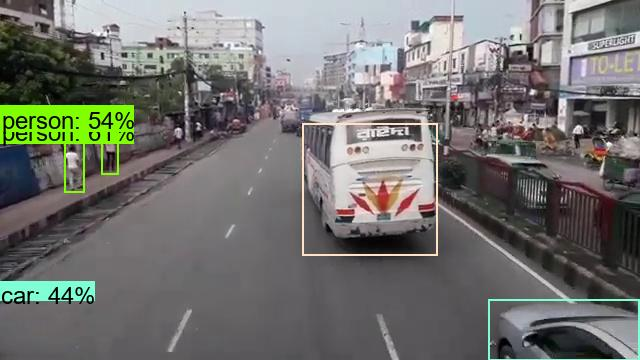

In [9]:
from IPython import display
display.display(display.Image(os.path.join(serve_image_out, '2.jpg')))